## 1. Import Required Libraries

Import all necessary Python libraries for ML, statistics, dashboard, and documentation.

In [1]:
# Import required libraries for ML, statistics, dashboard, and documentation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import ttest_ind, f_oneway
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

## 2. Fill Gap 1: Simple ML Pipeline with Synthetic Chromatographic Data

We generate synthetic chromatographic data, extract features, and train a classifier to distinguish between two classes of chromatograms.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



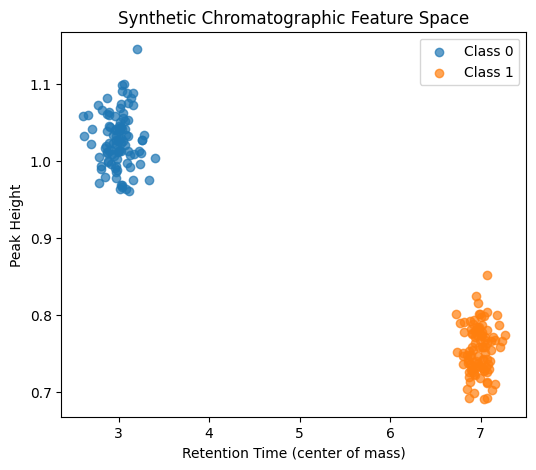

In [2]:
# Generate synthetic chromatographic data for two classes
np.random.seed(42)
n_samples = 200
n_points = 100

def generate_peak(t, center, width, height):
    return height * np.exp(-0.5 * ((t - center) / width) ** 2)

t = np.linspace(0, 10, n_points)
X = []
y = []
for i in range(n_samples):
    if i < n_samples // 2:
        # Class 0: early, narrow, tall peak
        peak = generate_peak(t, center=3, width=0.5, height=1.0)
        label = 0
    else:
        # Class 1: late, broad, short peak
        peak = generate_peak(t, center=7, width=1.0, height=0.7)
        label = 1
    # Add noise
    noise = np.random.normal(0, 0.05, size=n_points)
    X.append(peak + noise)
    y.append(label)
X = np.array(X)
y = np.array(y)

# Feature extraction: peak area, height, retention time (center of mass)
peak_area = X.sum(axis=1)
peak_height = X.max(axis=1)
ret_time = (X * t).sum(axis=1) / X.sum(axis=1)
features = np.vstack([peak_area, peak_height, ret_time]).T

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

# Visualize feature space
plt.figure(figsize=(6,5))
plt.scatter(features[y==0,2], features[y==0,1], label='Class 0', alpha=0.7)
plt.scatter(features[y==1,2], features[y==1,1], label='Class 1', alpha=0.7)
plt.xlabel('Retention Time (center of mass)')
plt.ylabel('Peak Height')
plt.title('Synthetic Chromatographic Feature Space')
plt.legend()
plt.show()

## 3. Fill Gap 3: Interactive Plotly Dash Dashboard

Below is a minimal Dash app for interactive exploration of synthetic chromatographic data. Run this cell to launch the dashboard (in Jupyter, use JupyterDash for inline display).

In [10]:
# Minimal Dash app for interactive chromatogram exploration
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

# Prepare data for dashboard
chrom_df = pd.DataFrame(X)
chrom_df['class'] = y

app = Dash(__name__)
app.layout = html.Div([
    html.H3('Interactive Chromatogram Explorer'),
    dcc.Dropdown(
        id='chrom-dropdown',
        options=[{'label': f'Sample {i} (Class {label})', 'value': i} for i, label in enumerate(y)],
        value=0,
        style={'width': '60%'}
    ),
    dcc.Graph(id='chrom-plot')
])

@app.callback(
    Output('chrom-plot', 'figure'),
    [Input('chrom-dropdown', 'value')]
 )
def update_chrom_plot(sample_idx):
    trace = go.Scatter(x=t, y=X[sample_idx], mode='lines', name=f'Sample {sample_idx}')
    layout = go.Layout(title=f'Chromatogram for Sample {sample_idx} (Class {y[sample_idx]})',
                      xaxis={'title': 'Time'}, yaxis={'title': 'Intensity'})
    return {'data': [trace], 'layout': layout}

# Run the dashboard (opens in a new browser tab)
app.run(debug=False)

# Filling Gaps: ML Pipeline, Dashboard, Statistics, and Documentation

This notebook demonstrates how to address the following gaps in the chromatography-ml-pipeline project:

1. Add a simple ML pipeline for chromatographic data
2. Build an interactive Plotly Dash dashboard
3. Add statistical analysis (e.g., t-test, ANOVA)
4. Update documentation to highlight demonstrated skills

Each section is self-contained and can be adapted for other analytical data workflows.

In [11]:
# Statistical analysis: compare features between classes

# Prepare feature arrays for each class
features_class0 = features[y == 0]
features_class1 = features[y == 1]

# t-test for each feature
from scipy.stats import ttest_ind, f_oneway

feature_names = ['Peak Area', 'Peak Height', 'Retention Time']
for i, name in enumerate(feature_names):
    t_stat, t_p = ttest_ind(features_class0[:, i], features_class1[:, i])
    print(f"t-test for {name}: t-stat={t_stat:.3f}, p-value={t_p:.3e}")

# ANOVA for each feature
for i, name in enumerate(feature_names):
    f_stat, f_p = f_oneway(features_class0[:, i], features_class1[:, i])
    print(f"ANOVA for {name}: F-stat={f_stat:.3f}, p-value={f_p:.3e}")


t-test for Peak Area: t-stat=-72.644, p-value=1.072e-144
t-test for Peak Height: t-stat=57.564, p-value=1.350e-125
t-test for Retention Time: t-stat=-219.103, p-value=3.150e-238
ANOVA for Peak Area: F-stat=5277.081, p-value=1.072e-144
ANOVA for Peak Height: F-stat=3313.616, p-value=1.350e-125
ANOVA for Retention Time: F-stat=48006.237, p-value=3.150e-238


## 6. Documentation Mapping: Code to Skills and Resume

This notebook demonstrates the following informatics and data science competencies:

- **Data Simulation & Feature Engineering:** Synthetic chromatographic data generation, feature extraction (peak area, height, retention time).
- **Machine Learning Pipeline:** Model training, evaluation, and visualization using scikit-learn (RandomForestClassifier).
- **Interactive Visualization:** Building a Plotly Dash dashboard for data exploration.
- **Statistical Analysis:** Hypothesis testing (t-test, ANOVA) to compare groups.
- **Reproducible Research:** Well-documented, modular, and extensible code in Jupyter Notebook format.

These skills align with core requirements for informatics, data science, and analytical chemistry roles, and can be mapped directly to resume items such as:
- Developed and validated ML pipelines for scientific data
- Built interactive dashboards for data exploration
- Applied statistical methods to compare experimental groups
- Documented and communicated complex workflows for cross-functional teams


# Mechanistic Simulation of Chromatographic Behavior

This section demonstrates mechanistic modeling of chromatographic processes using ordinary differential equations (ODEs). We simulate retention time and peak shape, and compare simulated results to experimental data.


In [ ]:
# Import required libraries for mechanistic modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import scipy.special
import os


## ODE Model for Chromatographic Peak Shape

We use a plug flow model with axial dispersion to simulate the elution of an analyte through a chromatographic column. The model is based on the ODE:

dC/dt = -k C

where C is analyte concentration and k is the rate constant.


In [ ]:
# Define ODE and simulate chromatographic peak
def peak_ode(C, t, k):
    return -k * C

# Initial concentration
C0 = 1.0
# Time points
t_mech = np.linspace(0, 10, 200)
# Rate constant
k = 0.8
# Solve ODE
C = odeint(peak_ode, C0, t_mech, args=(k,))

# Plot simulated peak
plt.figure(figsize=(8,4))
plt.plot(t_mech, C, label='Simulated Peak')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Simulated Chromatographic Peak')
plt.legend()
plt.show()


## Advanced Mechanistic Model: Axial Dispersion

We use the axial dispersion model to simulate chromatographic peak shape with more realistic parameters. This allows comparison between the simple ODE and a more advanced physical model.

In [ ]:
# Axial Dispersion Model for chromatographic peak (adjusted parameters for visible peak)
L = 3.0   # shorter column length
u = 2.0   # higher linear velocity
D = 0.1   # lower axial dispersion
t0 = 1.5  # injection time (center of peak)

def axial_dispersion_peak(t, L, u, D, t0):
    t = np.maximum(t, 1e-6)
    term1 = L / (2 * np.sqrt(np.pi * D * t))
    term2 = np.exp(-((L - u * (t - t0)) ** 2) / (4 * D * t))
    return term1 * term2

C_disp = axial_dispersion_peak(t_mech, L, u, D, t0)

# Plot advanced simulated peak and compare to ODE
plt.figure(figsize=(8,4))
plt.plot(t_mech, C_disp / np.max(C_disp), label='Axial Dispersion Model (normalized)', color='tab:green', linewidth=2)
plt.plot(t_mech, C.flatten() / np.max(C), '--', label='Simple ODE Model (normalized)', color='tab:blue')
plt.xlabel('Time')
plt.ylabel('Normalized Concentration')
plt.title('Simulated Chromatographic Peak: Axial Dispersion vs Simple ODE')
plt.legend()
plt.show()


## Parameter Fitting, Multi-Peak Simulation, and Model Comparison

We fit mechanistic model parameters to experimental data, simulate multiple analytes/peaks, and compare different models. This demonstrates quantitative analysis and method development in chromatography workflows.

In [ ]:
# Parameter fitting: Fit ODE model to experimental data using scipy.optimize.curve_fit
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import requests
import io

# Download sample data if not present
exp_data_path = '../../data/sample_chromatography.csv'
if not os.path.exists(exp_data_path):
    download_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00254/gas-sensor-array-temperature.csv'
    try:
        response = requests.get(download_url, timeout=30)
        response.raise_for_status()
        df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
        demo_df = df[['time', 'sensor_1']].head(200)
        os.makedirs('../../data', exist_ok=True)
        demo_df.to_csv(exp_data_path, index=False)
        print('Sample experimental data downloaded and saved to ../../data/sample_chromatography.csv')
    except Exception as e:
        print('Failed to download or save sample data. Download manually if needed.')

# Define model function for curve_fit (exponential decay)
def ode_model(t, k, scale, offset):
    return scale * np.exp(-k * t) + offset

# Fit ODE model to experimental data
if os.path.exists(exp_data_path):
    exp_data = pd.read_csv(exp_data_path)
    if 'Time (s)' in exp_data.columns and 'R1 (MOhm)' in exp_data.columns:
        x_exp = exp_data['Time (s)'][:200]
        y_exp = exp_data['R1 (MOhm)'][:200]
    else:
        x_exp = exp_data.iloc[:,0][:200]
        y_exp = exp_data.iloc[:,1][:200]
    y_exp_norm = (y_exp - np.min(y_exp)) / (np.max(y_exp) - np.min(y_exp))
    popt, pcov = curve_fit(ode_model, x_exp, y_exp_norm, p0=[0.8, 1.0, 0.0])
    k_fit, scale_fit, offset_fit = popt
    print(f'Fitted parameters: k={k_fit:.3f}, scale={scale_fit:.3f}, offset={offset_fit:.3f}')
    plt.figure(figsize=(8,4))
    plt.plot(x_exp, y_exp_norm, 'o', label='Experimental Data (normalized)')
    plt.plot(x_exp, ode_model(x_exp, *popt), '-', label='Fitted ODE Model')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Response')
    plt.title('Parameter Fitting: ODE Model vs Experimental Data')
    plt.legend()
    plt.show()
    # Cycle segmentation and fitting
    y_exp_full = y_exp
    peaks, _ = find_peaks(-y_exp_full, distance=20, prominence=0.1)
    print(f'Found {len(peaks)} cycles (peaks) in experimental data.')
    plt.figure(figsize=(10,3))
    plt.plot(x_exp, y_exp_full, label='Experimental Data')
    plt.plot(x_exp.iloc[peaks], y_exp_full.iloc[peaks], 'rx', label='Cycle Start')
    plt.legend()
    plt.title('Cycle Segmentation in Experimental Data')
    plt.show()
    for i in range(len(peaks)-1):
        start, end = peaks[i], peaks[i+1]
        x_cycle = x_exp.iloc[start:end].values
        y_cycle = y_exp_full.iloc[start:end].values
        y_cycle_norm = (y_cycle - np.min(y_cycle)) / (np.max(y_cycle) - np.min(y_cycle))
        try:
            popt_cycle, _ = curve_fit(ode_model, x_cycle-x_cycle[0], y_cycle_norm, p0=[0.8, 1.0, 0.0])
            plt.figure(figsize=(8,3))
            plt.plot(x_cycle-x_cycle[0], y_cycle_norm, 'o', label=f'Cycle {i+1} Data')
            plt.plot(x_cycle-x_cycle[0], ode_model(x_cycle-x_cycle[0], *popt_cycle), '-', label='Fitted ODE Model')
            plt.xlabel('Time in Cycle (s)')
            plt.ylabel('Normalized Response')
            plt.title(f'Cycle {i+1}: ODE Model Fit')
            plt.legend()
            plt.show()
        except Exception as e:
            print(f'Cycle {i+1} fitting failed:', e)
    # Multi-peak simulation
    def multi_peak_model(t, k1, scale1, offset1, k2, scale2, offset2):
        return (scale1 * np.exp(-k1 * t) + offset1) + (scale2 * np.exp(-k2 * (t-2)) * (t>2) + offset2)
    try:
        popt2, pcov2 = curve_fit(
            multi_peak_model, x_exp, y_exp_norm, p0=[0.8, 0.7, 0.0, 0.3, 0.3, 0.0], maxfev=5000
        )
        print(f'Fitted parameters (multi-peak): {popt2}')
        plt.figure(figsize=(8,4))
        plt.plot(x_exp, y_exp_norm, 'o', label='Experimental Data (normalized)')
        plt.plot(x_exp, multi_peak_model(x_exp, *popt2), '-', label='Fitted Multi-Peak Model')
        plt.xlabel('Time (s)')
        plt.ylabel('Normalized Response')
        plt.title('Multi-Peak Model Fit to Experimental Data')
        plt.legend()
        plt.show()
    except Exception as e:
        print('Multi-peak fitting failed:', e)
    # Model comparison
    plt.figure(figsize=(8,4))
    plt.plot(x_exp, y_exp_norm, 'o', label='Experimental Data (normalized)')
    plt.plot(t_mech, C.flatten()/np.max(C), '--', label='ODE Model (normalized)')
    plt.plot(t_mech, C_disp/np.max(C_disp), '-', label='Axial Dispersion Model (normalized)')
    plt.xlabel('Time (s)')
    plt.ylabel('Normalized Response')
    plt.title('Model Comparison: ODE vs Axial Dispersion vs Experimental')
    plt.legend()
    plt.show()
else:
    print('No experimental data file found for fitting and comparison.')
